# Project 1, Part 3, Executive Questions: Product Specific Questions

University of California, Berkeley
Master of Information and Data Science (MIDS) program
w205 - Fundamentals of Data Engineering

Student: Landon Morin

Year: 2022

Semester: Spring

Section:


# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)

In [3]:
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

In [4]:
cursor = connection.cursor()

# Instructions for Specific Questions

For each specific quesion, you must write 1 and only 1 query that answers that specific question.  The results of your query must be displayed in a Pandas dataframe as demonstrated in the labs

All output should be sorted.

For store name, use the city name the store is located in.

When sorting by store name, sort in alphabetical order.

For meal name, use the product description.

When sorting by meal name, sort in alphabetical order.

For month, use the full month name: January, February, March, etc.

When sorting by month, sort in calendar order: January, February, March, etc.  You may find it useful to include a month number to help with the sort.  It's ok to leave it in the output.

For day of week, use the full day of week name: Sunday, Monday, Tuesday, etc.

When sorting by day of week, sort in day of week order: Sunday, Monday, Tuesday, etc. You may find it usefule to include a day of week number to help with the sort.  It's ok to leave it in the output.


# 1.3.1 How many meals were purchased for all of AGM?

In [5]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sum(quantity) as total_meals_purchased
from line_items

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_meals_purchased
0,8228284


# 1.3.2 How many meals were purchased for all of AGM by meal?

Sort by meal name in alphabetical order

In [6]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select p.description as meal_name,
       sum(l.quantity) as total_meals_purchased
from line_items as l
    join products as p
        on l.product_id = p.product_id
group by meal_name
order by meal_name

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,meal_name,total_meals_purchased
0,Brocolli Stir Fry,913984
1,Chicken Salad,228561
2,Curry Chicken,1368884
3,Eggplant Lasagna,1599058
4,Pistachio Salmon,1828778
5,Spinach Orzo,456769
6,Teriyaki Chicken,1145013
7,Tilapia Piccata,687237


# 1.3.3 How many meals were purchased by store and by meal?

Sort by store name in alphabetical order, then by meal name in alphabetical order

In [7]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store,
       p.description as meal_name,
       sum(l.quantity) as total_meals_purchased
from line_items as l
    join stores as s
        on l.store_id = s.store_id
    join products as p
        on l.product_id = p.product_id
group by s.city, meal_name
order by s.city, meal_name

"""

df2=my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df2

,store,meal_name,total_meals_purchased
0,Berkeley,Brocolli Stir Fry,232038
1,Berkeley,Chicken Salad,57719
2,Berkeley,Curry Chicken,346508
3,Berkeley,Eggplant Lasagna,405637
4,Berkeley,Pistachio Salmon,464274
5,Berkeley,Spinach Orzo,115469
6,Berkeley,Teriyaki Chicken,290858
7,Berkeley,Tilapia Piccata,174252
8,Dallas,Brocolli Stir Fry,179885
9,Dallas,Chicken Salad,44756


# 1.3.4 How many meals were purchased by month?

Sort by month in calendar order

In [8]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select to_char(date_trunc('month', sa.sale_date), 'Month') as month, 
       sum(l.quantity) as total_meals_purchased
from sales as sa 
     join line_items as l 
         on sa.sale_id = l.sale_id
group by date_trunc('month', sale_date)
order by date_trunc('month', sale_date)

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,month,total_meals_purchased
0,January,3252637
1,February,3152564
2,March,3660355
3,April,3435052
4,May,3330027
5,June,3380074
6,July,3326135
7,August,3591531
8,September,2785597
9,October,2876508


# 1.3.5 How many meals were purchased by month and meal?

Sort by month in calendar order, then by meal name in alphabetical order

In [9]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select to_char(date_trunc('month', sa.sale_date), 'Month') as month, 
       p.description as meal_name,
       sum(l.quantity) as total_meals_purchased
from sales as sa 
     join line_items as l 
         on sa.sale_id = l.sale_id
     join products as p
         on l.product_id = p.product_id
group by date_trunc('month', sale_date), p.description
order by date_trunc('month', sale_date), p.description

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)


,month,meal_name,total_meals_purchased
0,January,Brocolli Stir Fry,360924
1,January,Chicken Salad,90123
2,January,Curry Chicken,541187
3,January,Eggplant Lasagna,631818
4,January,Pistachio Salmon,720970
...,...,...,...
91,December,Eggplant Lasagna,371340
92,December,Pistachio Salmon,425360
93,December,Spinach Orzo,105496
94,December,Teriyaki Chicken,266347


# 1.3.6 How many meals were purchased by day of week and meal?

Sort by day of week in day of week order, then by meal name in alphabetical order

In [10]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select to_char(date_trunc('day', sale_date), 'Day') as day_of_week,
       p.description as meal_name,
       sum(l.quantity) as total_meals_purchased
from sales as sa 
     join line_items as l 
         on sa.sale_id = l.sale_id
     join products as p
         on l.product_id = p.product_id
group by day_of_week, extract(dow from sale_date), p.description
order by extract(dow from sale_date), p.description


"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,day_of_week,meal_name,total_meals_purchased
0,Sunday,Brocolli Stir Fry,767460
1,Sunday,Chicken Salad,192077
2,Sunday,Curry Chicken,1149614
3,Sunday,Eggplant Lasagna,1343248
4,Sunday,Pistachio Salmon,1537853
5,Sunday,Spinach Orzo,383486
6,Sunday,Teriyaki Chicken,961561
7,Sunday,Tilapia Piccata,577641
8,Monday,Brocolli Stir Fry,545188
9,Monday,Chicken Salad,136507


# 1.3.7 Average number of meals per sale for all of AGM


In [11]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select round(sum(quantity)/count(distinct(sale_id, store_id)), 2) as avg_num_meals
from line_items

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,avg_num_meals
0,5.35


# 1.3.8 Average number of meals per sale by store

Sort by store name in alphabetical order


In [12]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store,
       round(sum(l.quantity)/count(distinct(l.sale_id, l.store_id)), 2) as avg_num_meals
from line_items as l
    join stores as s
        on l.store_id = s.store_id
group by s.city
order by s.city

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,avg_num_meals
0,Berkeley,5.35
1,Dallas,5.35
2,Miami,5.36
3,Nashville,5.33
4,Seattle,5.36


# 1.3.9 The Executives have also asked you to provide your best example of a data visualization for one of the above queries

You may choose any one of the above queries. 

It's best to select the one that you think will provide the most interesting data visualization.  

You are allowed to add a pivot as demonstrated in the labs if it is needed for your data visualization. 

In [30]:
df2["prop"] = df2["total_meals_purchased"] / df2.groupby("store")["total_meals_purchased"].transform("sum")

pallettes = sns.color_palette('muted')

def style_polar_axis(ax):
    # Change the initial location of the 0 in radians
    ax.set_theta_offset(np.pi / 2)
    
    # Move in clock-wise direction 
    ax.set_theta_direction(-1)

    # Remove all spines
    ax.set_frame_on(False)

    # Don't use tick labels for radial axis
    ax.set_xticklabels(['0%', '12.5%', '', '37.5%', '', '62.5%', '', '87.5%'])
    
    # Set limits for y axis
    ax.set_ylim([0, 5.5])
    # Set ticks for y axis. These determine the grid lines.
    ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 6.5])
    # But don't use tick labels
    ax.set_yticklabels([])
    
    return ax


In [31]:
def add_labels_polar_axis(ax, color):
    # Define the characteristics of the bbox behind the text we add
    bbox_dict = {
        "facecolor": "w", "edgecolor": color, "linewidth": 1, 
        "boxstyle": "round", "pad": 0.15
    }
    store = ['', 'B', 'D', 'S', 'M', 'N']
    # Iterate over types of plastics and add the labels
    for idx, store in enumerate(store):
        ax.text(
            0, idx, store, color=color, ha="center", va="center",
            fontsize=11, bbox=bbox_dict
        )
    return ax

In [32]:
def plot_circular(axes):
    axes_flattened = axes.ravel()
    meals = df2["meal_name"].unique()
    
    # Iterate over companies and plots
    for i, meal in enumerate(meals):
        # Select data for the given meal
        d = df2[df2["meal_name"] == meal]
        
        # Select plot
        ax = axes_flattened[i]
        
        # Only for the first panel, add label for vertical axis
        if i == 0:
            ax.set_ylabel("Meal", loc="top")
        
        # Adjust style of the plot
        ax = style_polar_axis(ax)
        
        # Multiply the proportion by the 2pi, the complete rotation 
        proportions = d["prop"].values * (2 * np.pi)
        
        # Positions for the lines on the radial
        y_pos = np.arange(1, len(proportions)+1)
        
        # Construct the line for each type of plastic creating a grid for the x and y values
        x = np.linspace(0, proportions, num=200)
        y = np.vstack([y_pos] * 200)

        # Select color
        color = pallettes[i]
        
        # And finally, plot the rounded lines
        ax.plot(x, y, lw=6, color=color, solid_capstyle="round")
        
        # Add title
        ax.set_title(meal, pad=5, color="0.3")
        
        # Add labels on top of the lines
        ax = add_labels_polar_axis(ax, color)
    return axes





<ipython-input-30-cddf3f3042e9>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0%', '12.5%', '', '37.5%', '', '62.5%', '', '87.5%'])
<ipython-input-30-cddf3f3042e9>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0%', '12.5%', '', '37.5%', '', '62.5%', '', '87.5%'])
<ipython-input-30-cddf3f3042e9>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0%', '12.5%', '', '37.5%', '', '62.5%', '', '87.5%'])
<ipython-input-30-cddf3f3042e9>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0%', '12.5%', '', '37.5%', '', '62.5%', '', '87.5%'])
<ipython-input-30-cddf3f3042e9>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0%', '12.5%', '', '37.5%', '', '62.5%', '', '87.5%'])
<ipython-input-30-cddf3f3042e9>:16: UserWarning: FixedFormat

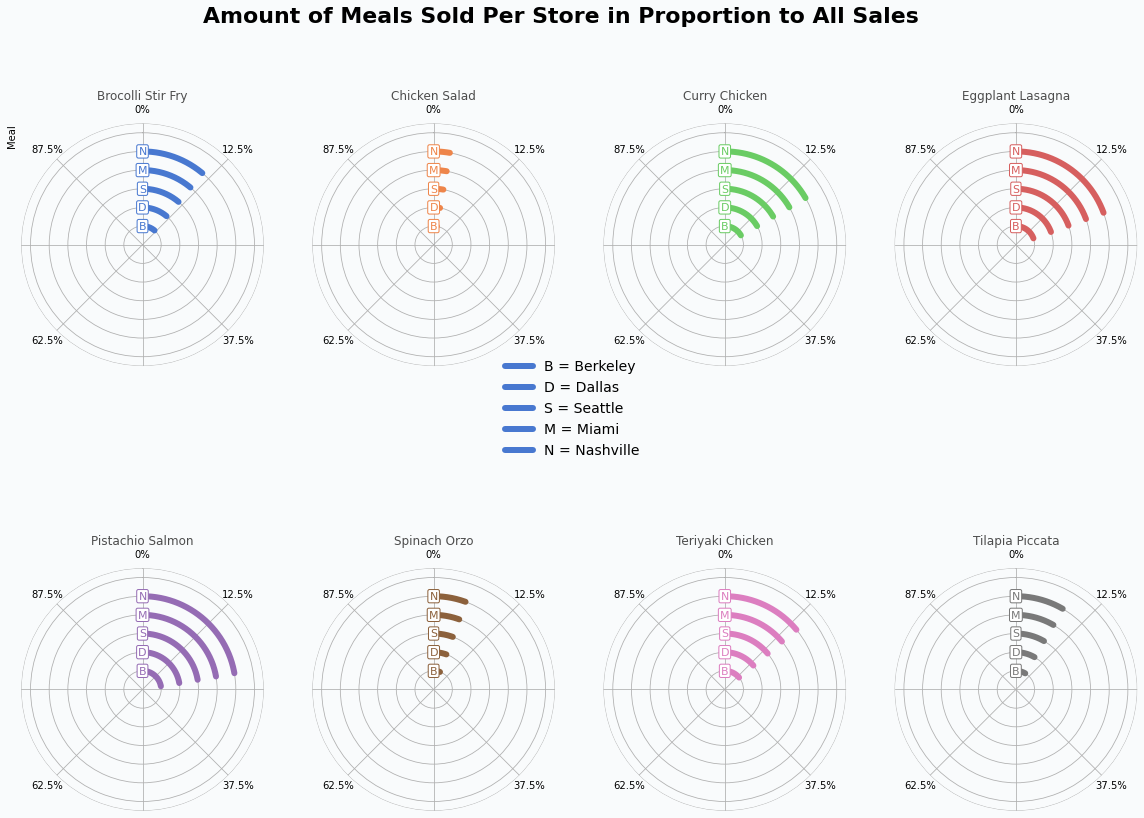

In [33]:
fig, axes = plt.subplots(2, 4, figsize=(20, 15), subplot_kw={"projection": "polar"})
axes = plot_circular(axes)

fig.text(
    x=0.5, 
    y=0.92,
    s="Amount of Meals Sold Per Store in Proportion to All Sales",
    ha="center",
    va="center",
    ma="center",
    fontsize=22,
    fontweight="bold",
    fontname="Inconsolata"
)


fig.legend(['B = Berkeley', 'D = Dallas', 'S = Seattle', 'M = Miami', 'N = Nashville'],
          loc='center', frameon=False, fontsize = 14)


# Sets background color
fig.set_facecolor("#f9fbfc")